(0.0, 100.0)

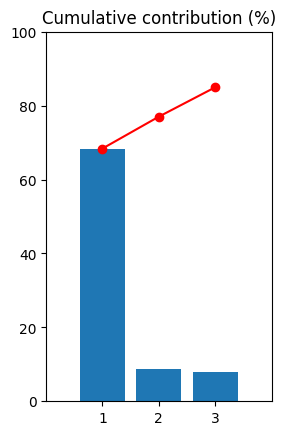

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


from openbb import obb
from sklearn.decomposition import PCA

obb.user.preferences.output_type = 'dataframe'
stocks = ['IAG', 'EXK', 'NGD', 'CDE', 'KGC', 'AEM', 'HMY']
data = obb.equity.price.historical(
    stocks,
    start_date='2016-01-01',
    provider='yfinance'
).pivot(columns='symbol', values='close')

returns = data.pct_change(fill_method=None).dropna()

pca = PCA(n_components=3)
pca.fit(returns)
pca_explained_variance_ratio = pca.explained_variance_ratio_
pca_components = pca.components_

cum_pct = np.cumsum(pca_explained_variance_ratio)
ax = np.arange(1, len(pca_explained_variance_ratio) + 1, 1)
plt.subplot(1, 2, 1)
plt.bar(ax, pca_explained_variance_ratio * 100, align='center')
plt.title('contribution (%)')
plt.xticks(ax)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 1)
plt.plot(ax, cum_pct * 100, 'ro-')
plt.title('Cumulative contribution (%)')
plt.xticks(ax)
plt.xlim([0, 4])
plt.ylim([0, 100])